In [1]:
# https://github.com/a-milenkin/Competitive_Data_Science

import os
import shutil
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

import random
DEFAULT_RANDOM_SEED = 2021
def set_all_seeds(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
set_all_seeds(seed=DEFAULT_RANDOM_SEED)

### 1. Simple classification (catboost)

(2337, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
366,x-3347185z,Kia Rio X-line,economy,petrol,5.040,2015,97690,2015,41.760,gear_stick
2046,O-7679980f,MINI CooperSE,business,electro,4.380,2013,40181,2021,82.570,engine_ignition
1887,P-2086663p,VW Polo,economy,petrol,4.260,2015,95986,2018,65.720,engine_ignition


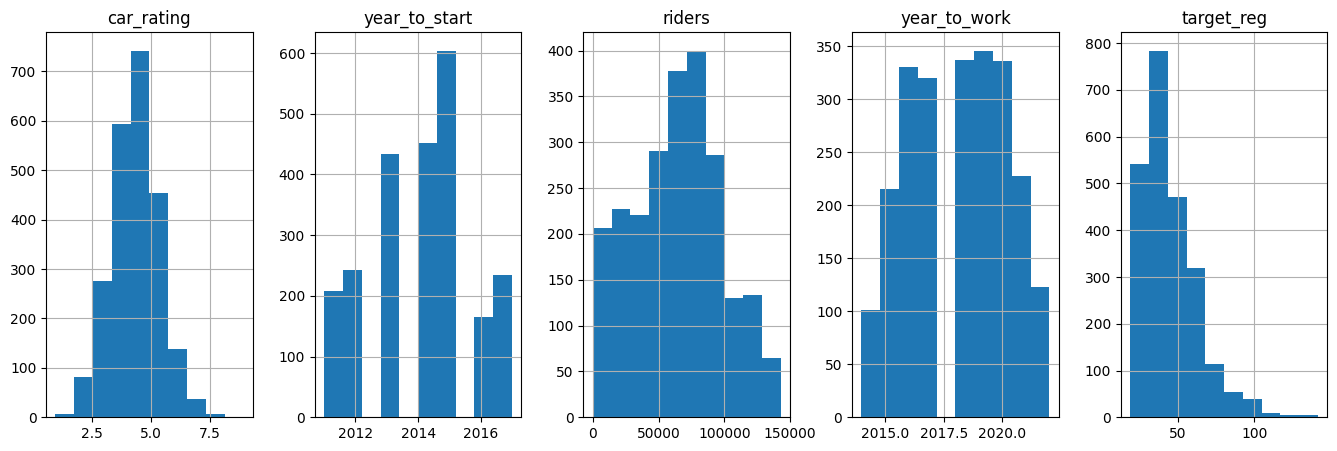

In [2]:
train = pd.read_csv("../data/car_train.csv")
print(train.shape)
train.hist(figsize=(20,5), layout=(1, 6))
train.sample(3)

In [3]:
from IPython.display import display

display(train.describe())
train.info()

,car_rating,year_to_start,riders,year_to_work,target_reg
count,2337.000,2337.000,2337.000,2337.000,2337.000
mean,4.354,2014.041,63711.444,2018.070,44.947
std,0.997,1.686,33755.012,2.159,17.580
min,0.980,2011.000,23.000,2014.000,18.920
25%,3.740,2013.000,41053.000,2016.000,31.670
50%,4.360,2014.000,64415.000,2018.000,40.170
75%,5.000,2015.000,86515.000,2020.000,54.790
max,8.900,2017.000,142862.000,2022.000,141.630


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         2337 non-null   object 
 1   model          2337 non-null   object 
 2   car_type       2337 non-null   object 
 3   fuel_type      2337 non-null   object 
 4   car_rating     2337 non-null   float64
 5   year_to_start  2337 non-null   int64  
 6   riders         2337 non-null   int64  
 7   year_to_work   2337 non-null   int64  
 8   target_reg     2337 non-null   float64
 9   target_class   2337 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 182.7+ KB


In [5]:
test = pd.read_csv("../data/car_test.csv")
print(test.shape)
test.sample(3)

(1913, 8)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
1787,g-1249815S,Renault Sandero,standart,petrol,6.620,2015,94502,2017
1637,G62487539y,Hyundai Solaris,economy,petrol,3.360,2014,61965,2020
785,b34607341j,Mini Cooper,business,petrol,4.040,2011,2740,2018


In [6]:
categorical_features = ['car_type', 'fuel_type', 'model'] 
targets = ['target_class', 'target_reg']
dropped_features = ['car_id']

filtered_features = [i for i in train.columns if (i not in targets and i not in dropped_features)]
numerical_features = [i for i in filtered_features if (i not in categorical_features)]

print('categorical_features :', len(categorical_features), categorical_features)
print('numerical_features :', len(numerical_features), numerical_features)
print('targets', targets)

categorical_features : 3 ['car_type', 'fuel_type', 'model']
numerical_features : 4 ['car_rating', 'year_to_start', 'riders', 'year_to_work']
targets ['target_class', 'target_reg']


In [7]:
#!pip install catboost
#!pip install scikit-learn

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
clf = CatBoostClassifier(cat_features=categorical_features)

clf.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        verbose=150, plot=False)
shutil.rmtree('catboost_info') # remove catboost_info folder

y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

# saving it if needed
test['target_class'] = clf.predict(test[filtered_features]).ravel()
test[['car_id', 'target_class']].to_csv('../subs/simple_baseline_v1.csv', index=False)

Learning rate set to 0.109335
0:	learn: 2.1911361	test: 2.1951349	best: 2.1951349 (0)	total: 159ms	remaining: 2m 38s
150:	learn: 1.6539682	test: 2.2440578	best: 2.1908935 (6)	total: 4.11s	remaining: 23.1s
300:	learn: 1.2455381	test: 2.3306861	best: 2.1908935 (6)	total: 8.05s	remaining: 18.7s
450:	learn: 0.9655173	test: 2.4024298	best: 2.1908935 (6)	total: 11.9s	remaining: 14.5s
600:	learn: 0.7488971	test: 2.4913589	best: 2.1908935 (6)	total: 15.9s	remaining: 10.6s
750:	learn: 0.5826318	test: 2.5762847	best: 2.1908935 (6)	total: 20.1s	remaining: 6.66s
900:	learn: 0.4643456	test: 2.6651694	best: 2.1908935 (6)	total: 24.1s	remaining: 2.65s
999:	learn: 0.4027101	test: 2.7091668	best: 2.1908935 (6)	total: 26.7s	remaining: 0us

bestTest = 2.19089351
bestIteration = 6

Shrink model to first 7 iterations.

 Accuracy: 0.0876068376068376


In [9]:
rides = pd.read_csv("../data/rides_info.csv")
rides.sample(5)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
641896,L34789768Q,t-8913790b,i1K,2020-01-06,6.770,28,247,54,82.000,2,1227.929,0,0.494,2.330
584874,J22038765B,p-8776685b,n1n,2020-02-02,7.880,505,6054,50,95.000,1,825.422,0,-12.837,-16.094
372711,Z19603355K,a11345005q,h1O,2020-01-02,6.110,16,314,48,75.000,0,809.607,0,2.642,0.000
33705,J32156960o,C-1846243L,y1W,2020-03-06,4.310,57,736,58,89.000,0,3010.627,0,11.901,13.831
67950,O11126407z,E41968356d,B1c,2020-02-17,7.080,27,319,46,58.000,2,1150.135,0,-1.308,-7.687


In [10]:
# information on the car 

rides_df_grouped = rides.groupby('car_id', as_index=False).agg(mean_rating = ('rating', 'mean'),
                                                   distance_sum = ('distance', 'sum'),
                                                   rating_min = ('rating', 'min'),
                                                   speed_max = ('speed_max', 'max'),
                                                   user_ride_quality_median = ('user_ride_quality', 'median'), 
                                                   deviation_normal_count = ('deviation_normal', 'count'),
                                                   user_uniq = ('user_id', 'nunique')) # nunique is pd.Series method

rides_df_grouped.head(3)

,car_id,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,A-1049127W,4.255,11257529.314,0.100,179.730,-0.288,174,172
1,A-1079539w,4.088,19127650.497,0.100,184.506,2.509,174,173
2,A-1162143G,4.662,2995193.848,0.100,180.000,0.640,174,172


In [11]:
train_merged = train.merge(rides_df_grouped, on = 'car_id', how = 'left')
test_merged = test.merge(rides_df_grouped, on = 'car_id', how = 'left')

train_merged.to_csv('../tmp_data/quickstart_train.csv', index=False)
test_merged.to_csv('../tmp_data/quickstart_test.csv', index=False)

train.sample(2)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
1351,Y17319354d,Smart ForFour,economy,petrol,3.320,2017,123031,2018,59.990,engine_ignition
2311,e-1590992X,Kia Rio X,economy,petrol,6.260,2012,27706,2017,29.320,electro_bug


In [12]:
filtered_features = [i for i in train_merged.columns if (i not in targets and i not in dropped_features)]
numerical_features = [i for i in filtered_features if i not in categorical_features]


print('num_features :', len(numerical_features), numerical_features)
print('cat_features :', len(categorical_features), categorical_features)
print('targets', targets)

num_features : 11 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
cat_features : 3 ['car_type', 'fuel_type', 'model']
targets ['target_class', 'target_reg']


In [13]:
X = train_merged[filtered_features].drop(targets, axis=1, errors='ignore')
y = train_merged['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=categorical_features)

clf.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        verbose=150, plot=False)
shutil.rmtree('catboost_info') # remove catboost_info folder

y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_pred, y_test)}')

Learning rate set to 0.109335
0:	learn: 1.8475119	test: 1.8655808	best: 1.8655808 (0)	total: 24.2ms	remaining: 24.2s
150:	learn: 0.3200590	test: 0.5547029	best: 0.5540463 (147)	total: 4.42s	remaining: 24.9s
300:	learn: 0.1971982	test: 0.5615205	best: 0.5513186 (167)	total: 9.22s	remaining: 21.4s
450:	learn: 0.1375334	test: 0.5712868	best: 0.5513186 (167)	total: 14s	remaining: 17.1s
600:	learn: 0.0980050	test: 0.5823510	best: 0.5513186 (167)	total: 18.7s	remaining: 12.4s
750:	learn: 0.0738682	test: 0.5989975	best: 0.5513186 (167)	total: 23.5s	remaining: 7.79s
900:	learn: 0.0569120	test: 0.6151325	best: 0.5513186 (167)	total: 28.3s	remaining: 3.1s
999:	learn: 0.0495492	test: 0.6233229	best: 0.5513186 (167)	total: 31.4s	remaining: 0us

bestTest = 0.5513186112
bestIteration = 167

Shrink model to first 168 iterations.

 Accuracy: 0.782051282051282


In [14]:
fi = clf.get_feature_importance(prettified=True)
fi

,Feature Id,Importances
0,speed_max,36.035
1,mean_rating,30.904
2,rating_min,13.939
3,model,4.206
4,car_type,3.881
5,user_uniq,3.036
6,user_ride_quality_median,2.098
7,distance_sum,1.614
8,riders,1.348
9,car_rating,1.149


In [18]:
test_merged['target_class'] = clf.predict(test_merged[filtered_features]).ravel()
test_merged[['car_id', 'target_class']].to_csv('../subs/simple_baseline_v2.csv', index=False)

### 2. Pandas
